In [461]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import urllib.request as urll

In [462]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
filename = 'InterpolacionNewtonNoequi.csv'
if not path.exists(filename):
    Path = urll.urlretrieve(url, filename)
else:
    print('--File found---')
    Path_ = filename

--File found---


In [463]:
Data = pd.read_csv(Path_,sep=",")

In [464]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [465]:
def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y
            
    poly = 1.0

    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
    
        for j in range(i, len(X)):
            h = X[j]-X
            Diff[j,i] = (Diff[j,i-1]-Diff[j-1,i-1])/h[j-i]
            
        Sum_ += poly*(Diff[i,i])
        
        
    return Sum_,np.round(Diff,2)
   

In [466]:
x = np.linspace(np.min(X),np.max(X),200)
y,_ = NewtonGregory(X,Y,x)

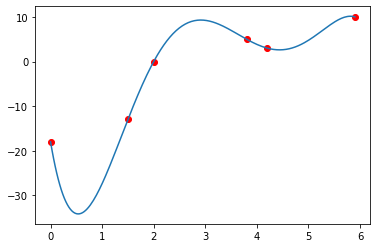

In [467]:
plt.scatter(X,Y,color='red')
plt.plot(x,y)

In [468]:
x = sym.Symbol('x',Real='True')
y,_ = NewtonGregory(X,Y,x)

In [469]:
y = y.simplify()

In [470]:
y

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0